In [1]:
import tensorflow as tf
from tensorflow.keras import regularizers, initializers, Sequential
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense

import matplotlib.pyplot as plt
import numpy as np

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
train_dir = "/kaggle/input/gender-detection-and-classification-image-dataset/test"
test_dir = "/kaggle/input/gender-detection-and-classification-image-dataset/test"

In [3]:
batch_size = 32
img_size = 224

In [4]:
train_ds = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                      batch_size=batch_size,
                                                      image_size=(img_size, img_size))

test_ds = tf.keras.utils.image_dataset_from_directory(test_dir,
                                                     batch_size=batch_size,
                                                     image_size=(img_size, img_size))

Found 80 files belonging to 2 classes.
Found 80 files belonging to 2 classes.


In [5]:
class_names = ['man', 'woman']
class_names

['man', 'woman']

In [6]:
train_ds = train_ds.prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.prefetch(tf.data.AUTOTUNE)

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


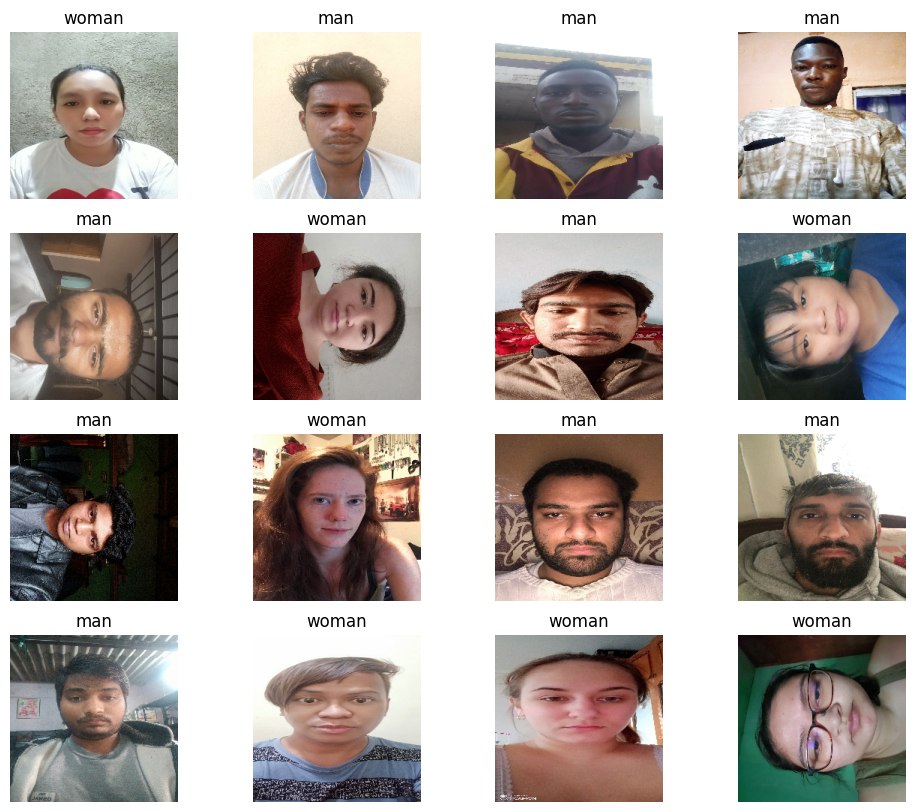

In [7]:
for image, label in train_ds.take(1):
    plt.figure(figsize=(12, 10))
    for i in range(16):
        plt.subplot(4, 4, i+1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(class_names[label[i]])
        plt.axis("off")

## Data Augmentation

In [8]:
data_augmentation = Sequential([
    tf.keras.layers.Resizing(180, 180),
    tf.keras.layers.RandomFlip("horizontal_and_vertical")
])

## Visualize Augmented Images

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


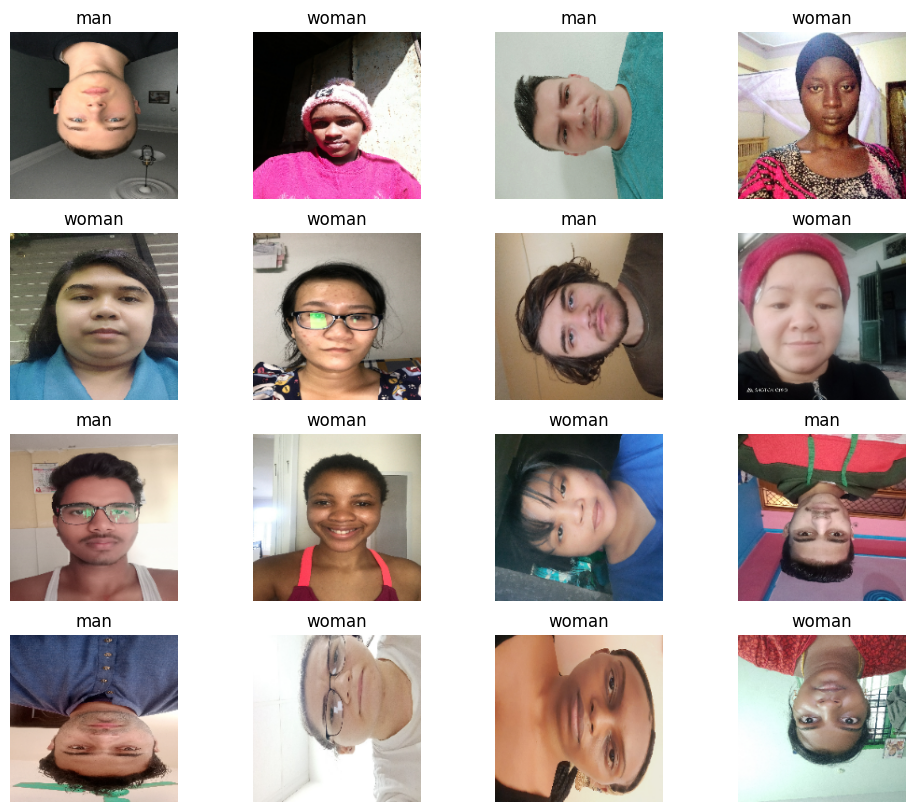

In [9]:
for image, label in train_ds.take(1):
    plt.figure(figsize=(12, 10))
    for i in range(16):
        plt.subplot(4, 4, i+1)
        augmented_image = data_augmentation(image)
        plt.imshow(augmented_image[i].numpy().astype("uint8"))
        plt.title(class_names[label[i]])
        plt.axis("off")

## Model Creation

In [10]:
regularizer = regularizers.l1(0.001)
initializer = initializers.HeNormal(seed=20)

model = Sequential([
    data_augmentation,
    Conv2D(64, 3, activation="relu", kernel_initializer=initializer, kernel_regularizer=regularizer),
    MaxPooling2D((2, 2)),
    Conv2D(32, 3, activation="relu", kernel_initializer=initializer, kernel_regularizer=regularizer),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(10, activation="softmax")
])

In [11]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [12]:
history = model.fit(train_ds, epochs=20)

Epoch 1/20


2023-12-21 17:39:51.086156: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


3/3 [==============================] - 14s 234ms/step - loss: 601.3275 - accuracy: 0.3375
Epoch 2/20


Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


3/3 [==============================] - 3s 63ms/step - loss: 439.8358 - accuracy: 0.5250
Epoch 3/20


Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


3/3 [==============================] - 3s 62ms/step - loss: 243.8265 - accuracy: 0.5000
Epoch 4/20


Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


3/3 [==============================] - 3s 61ms/step - loss: 13.3435 - accuracy: 0.4875
Epoch 5/20


Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


3/3 [==============================] - 3s 63ms/step - loss: 4.0661 - accuracy: 0.5375
Epoch 6/20


Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


3/3 [==============================] - 3s 61ms/step - loss: 2.7798 - accuracy: 0.5125
Epoch 7/20


Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


3/3 [==============================] - 3s 63ms/step - loss: 2.8041 - accuracy: 0.5250
Epoch 8/20


Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


3/3 [==============================] - 3s 64ms/step - loss: 2.6300 - accuracy: 0.5750
Epoch 9/20


Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


3/3 [==============================] - 3s 61ms/step - loss: 2.7428 - accuracy: 0.5875
Epoch 10/20


Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


3/3 [==============================] - 3s 62ms/step - loss: 2.5369 - accuracy: 0.6375
Epoch 11/20


Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


3/3 [==============================] - 3s 61ms/step - loss: 2.3841 - accuracy: 0.6125
Epoch 12/20


Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


3/3 [==============================] - 3s 63ms/step - loss: 2.1574 - accuracy: 0.7250
Epoch 13/20


Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


3/3 [==============================] - 3s 64ms/step - loss: 1.9886 - accuracy: 0.7625
Epoch 14/20


Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


3/3 [==============================] - 3s 63ms/step - loss: 2.0875 - accuracy: 0.7375
Epoch 15/20


Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


3/3 [==============================] - 3s 63ms/step - loss: 1.9712 - accuracy: 0.7750
Epoch 16/20


Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


3/3 [==============================] - 3s 63ms/step - loss: 1.9347 - accuracy: 0.7500
Epoch 17/20


Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


3/3 [==============================] - 3s 64ms/step - loss: 1.7307 - accuracy: 0.8625
Epoch 18/20


Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


3/3 [==============================] - 3s 65ms/step - loss: 1.9311 - accuracy: 0.8125
Epoch 19/20


Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


3/3 [==============================] - 3s 64ms/step - loss: 1.5446 - accuracy: 0.9000
Epoch 20/20


Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


3/3 [==============================] - 3s 64ms/step - loss: 1.7179 - accuracy: 0.8500


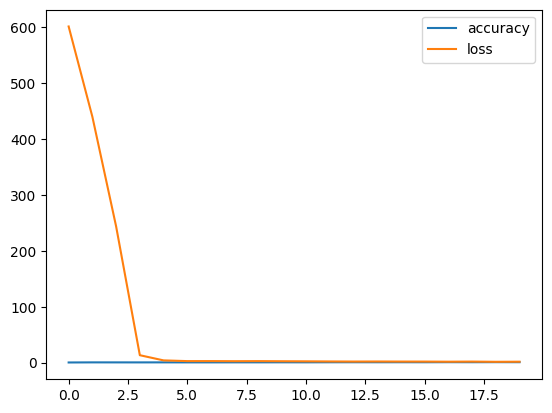

In [13]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['loss'], label='loss')
plt.legend()

In [14]:
from sklearn.metrics import f1_score

## Test on test dataset

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


1/1 [==============================] - 0s 204ms/step
[1]
1/1 [==============================] - 0s 22ms/step
[0]
1/1 [==============================] - 0s 23ms/step
[1]
1/1 [==============================] - 0s 20ms/step
[1]
1/1 [==============================] - 0s 21ms/step
[0]
1/1 [==============================] - 0s 22ms/step
[1]
1/1 [==============================] - 0s 20ms/step
[0]
1/1 [==============================] - 0s 23ms/step
[0]
1/1 [==============================] - 0s 22ms/step
[0]
1/1 [==============================] - 0s 22ms/step
[1]
1/1 [==============================] - 0s 25ms/step
[1]
1/1 [==============================] - 0s 23ms/step
[1]
1/1 [==============================] - 0s 22ms/step
[0]
1/1 [==============================] - 0s 21ms/step
[1]
1/1 [==============================] - 0s 22ms/step
[1]
1/1 [==============================] - 0s 22ms/step
[1]


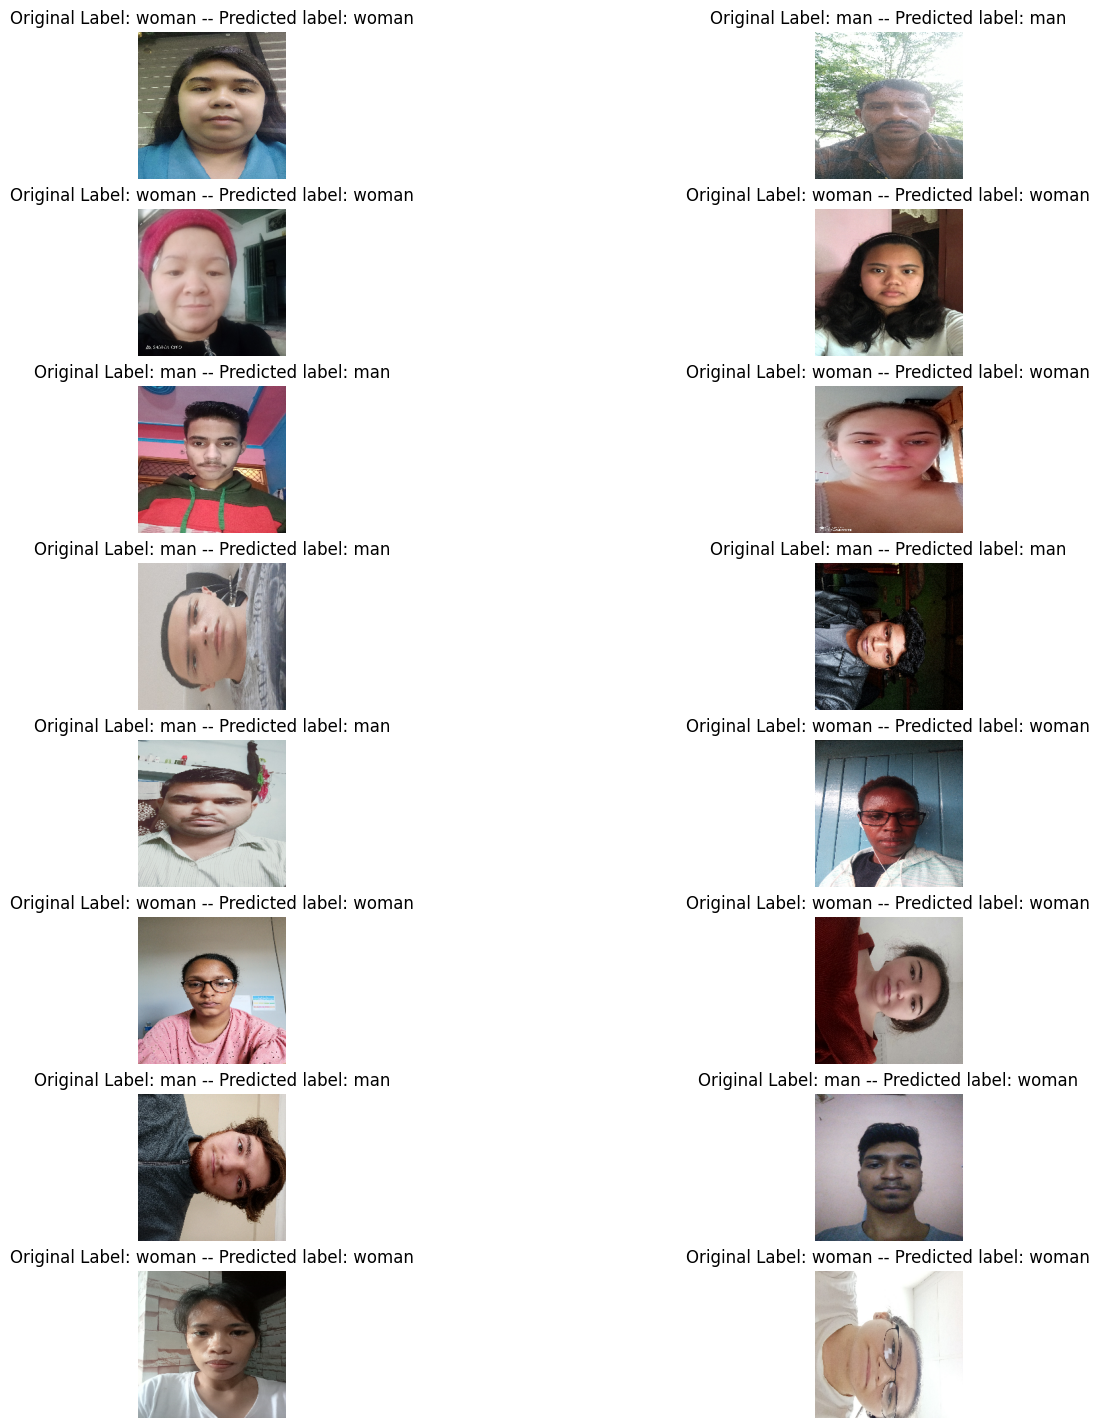

In [15]:
for image, label in test_ds.take(1):
    plt.figure(figsize=(16, 18))
    for i in range(16):
        plt.subplot(8, 2, i+1)
        plt.imshow(image[i].numpy().astype("uint8"))
        pred = model.predict(tf.expand_dims(image[i], axis=0))
        prediction = np.argmax(pred, axis=1)
        print(prediction)
        plt.title(f"Original Label: {class_names[label[i]]} -- Predicted label: {class_names[int(prediction)]}")
        plt.axis("off")

In [16]:
model.evaluate(test_ds)

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


3/3 [==============================] - 3s 14ms/step - loss: 1.5005 - accuracy: 0.9375


[1.5005255937576294, 0.9375]

## Save model

In [17]:
model.save("Gender_classification.keras")